In [65]:
import matplotlib.pyplot as plt
from seaborn import heatmap
import pandas as pd

In [66]:
data = pd.read_csv("./opt_out/result.csv")
data.head()

,Insulation Thickness,ACH,shading temperature,shading irradiation,glazing layers,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility
0,0.35,2.0,28.0,240.0,3,2541.182519,11074.992350,392.619998
1,0.35,6.0,28.0,240.0,3,2541.182519,11074.992350,392.619998
2,0.35,0.0,28.0,240.0,3,2541.182519,11074.992350,392.619998
3,0.35,4.0,28.0,240.0,3,2541.182519,11074.992350,392.619998
4,0.35,0.0,28.0,80.0,3,2545.476817,11074.992786,390.701380


In [22]:
groups=data.groupby("glazing layers")

In [26]:
test=groups.get_group(1).drop("glazing layers",axis=1)

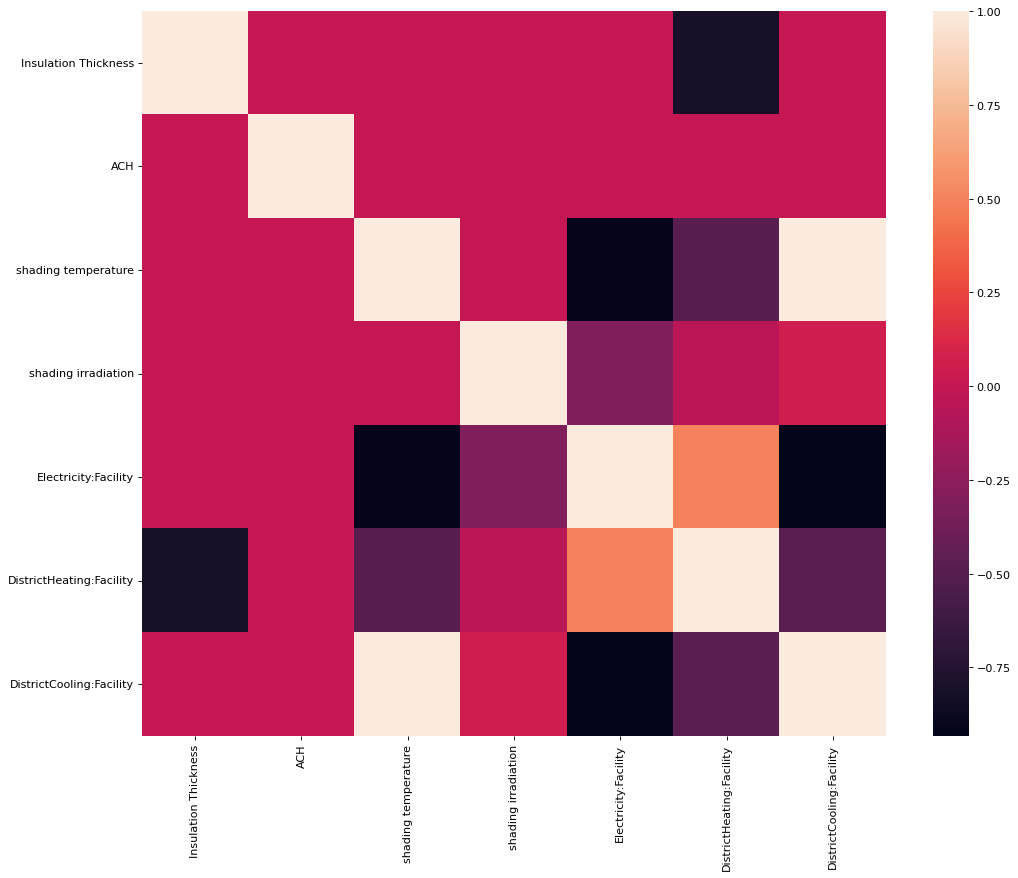

In [29]:
plt.figure(figsize=(15, 12), dpi=80)
_= heatmap(test.corr())
plt.savefig("./opt_out/heatmap_new.png")

In [91]:
groups=data.groupby("Insulation Thickness")

In [92]:
test=groups.get_group(0.35)[["glazing layers","Electricity:Facility","DistrictHeating:Facility","DistrictCooling:Facility"]]
test

,glazing layers,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility
0,3,2541.182519,11074.992350,392.619998
1,3,2541.182519,11074.992350,392.619998
2,3,2541.182519,11074.992350,392.619998
3,3,2541.182519,11074.992350,392.619998
4,3,2545.476817,11074.992786,390.701380
...,...,...,...,...
363,1,2590.301802,11624.222669,216.869012
364,1,2606.594808,11624.414972,213.976311
365,1,2606.594808,11624.414972,213.976311
366,1,2606.594808,11624.414972,213.976311


In [93]:
g_u = [3.835,1.512,0.780]
trans = [0.821,0.769,0.661]
SHGC = [0.768,0.597,0.474]
test2=test.copy()

In [94]:
g_u_list =[]
trans_list =[]
SHGC_list = []
# print(test["glazing layers"].tolist()[0])
# print(g_u[test["glazing layers"].tolist()[0]-1])
for i in range(len(test)):
    g_u_list.append(g_u[test["glazing layers"].tolist()[i]-1])
    trans_list.append(trans[test["glazing layers"].tolist()[i]-1])
    SHGC_list.append(SHGC[test["glazing layers"].tolist()[i]-1])
test2["U-value"]=g_u_list
test2["Light transmmision"]=trans_list
test2["SHGC"]=SHGC_list

In [95]:
test2=test2.drop(["glazing layers"],axis=1)
test2

,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,U-value,Light transmmision,SHGC
0,2541.182519,11074.992350,392.619998,0.780,0.661,0.474
1,2541.182519,11074.992350,392.619998,0.780,0.661,0.474
2,2541.182519,11074.992350,392.619998,0.780,0.661,0.474
3,2541.182519,11074.992350,392.619998,0.780,0.661,0.474
4,2545.476817,11074.992786,390.701380,0.780,0.661,0.474
...,...,...,...,...,...,...
363,2590.301802,11624.222669,216.869012,3.835,0.821,0.768
364,2606.594808,11624.414972,213.976311,3.835,0.821,0.768
365,2606.594808,11624.414972,213.976311,3.835,0.821,0.768
366,2606.594808,11624.414972,213.976311,3.835,0.821,0.768


In [96]:
test2=test2.reindex(columns=["U-value",
                       "Light transmmision",
                       "SHGC",
                       "Electricity:Facility",
                       "DistrictHeating:Facility",
                       "DistrictCooling:Facility"])
test2

,U-value,Light transmmision,SHGC,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility
0,0.780,0.661,0.474,2541.182519,11074.992350,392.619998
1,0.780,0.661,0.474,2541.182519,11074.992350,392.619998
2,0.780,0.661,0.474,2541.182519,11074.992350,392.619998
3,0.780,0.661,0.474,2541.182519,11074.992350,392.619998
4,0.780,0.661,0.474,2545.476817,11074.992786,390.701380
...,...,...,...,...,...,...
363,3.835,0.821,0.768,2590.301802,11624.222669,216.869012
364,3.835,0.821,0.768,2606.594808,11624.414972,213.976311
365,3.835,0.821,0.768,2606.594808,11624.414972,213.976311
366,3.835,0.821,0.768,2606.594808,11624.414972,213.976311


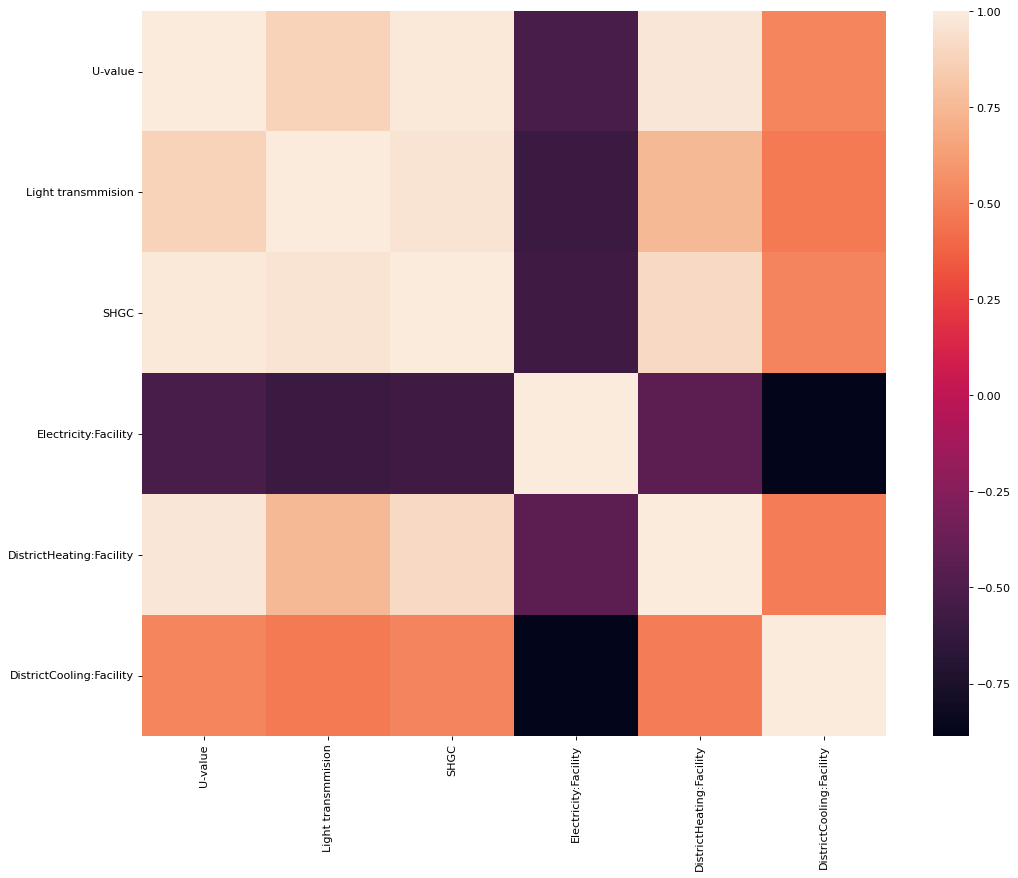

In [99]:
fig = plt.figure(figsize=(15, 12), dpi=80)
_= heatmap(test2.corr())

In [100]:
fig.savefig("./opt_out/heatmap_glazing.png")